In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = '/sales_data_with_discounts.csv'  # Replace with your file path
sales_data = pd.read_csv('/sales_data_with_discounts.csv')

In [4]:

# Identify numerical columns
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

In [5]:
# Calculate basic statistics: mean, median, mode, standard deviation
descriptive_stats = sales_data[numerical_cols].agg(['mean', 'median', 'std'])
print(descriptive_stats)

          Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
mean    5.066667  10453.433333       33812.835556          15.155242   
median  4.000000   1450.000000        5700.000000          16.577766   
std     4.231602  18079.904840       50535.074173           4.220602   

        Discount Amount  Net Sales Value  
mean        3346.499424     30466.336131  
median       988.933733      4677.788059  
std         4509.902963     46358.656624  


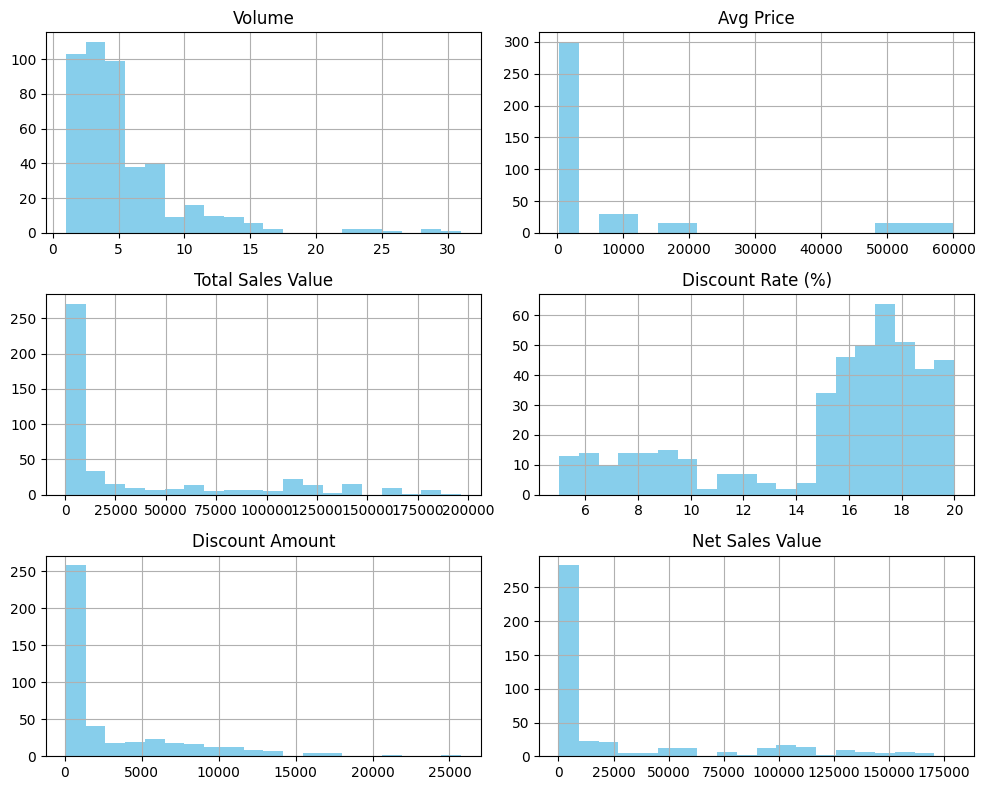

In [6]:
# Plot histograms for each numerical column
sales_data[numerical_cols].hist(figsize=(10, 8), bins=20, color='skyblue')
plt.tight_layout()
plt.show()

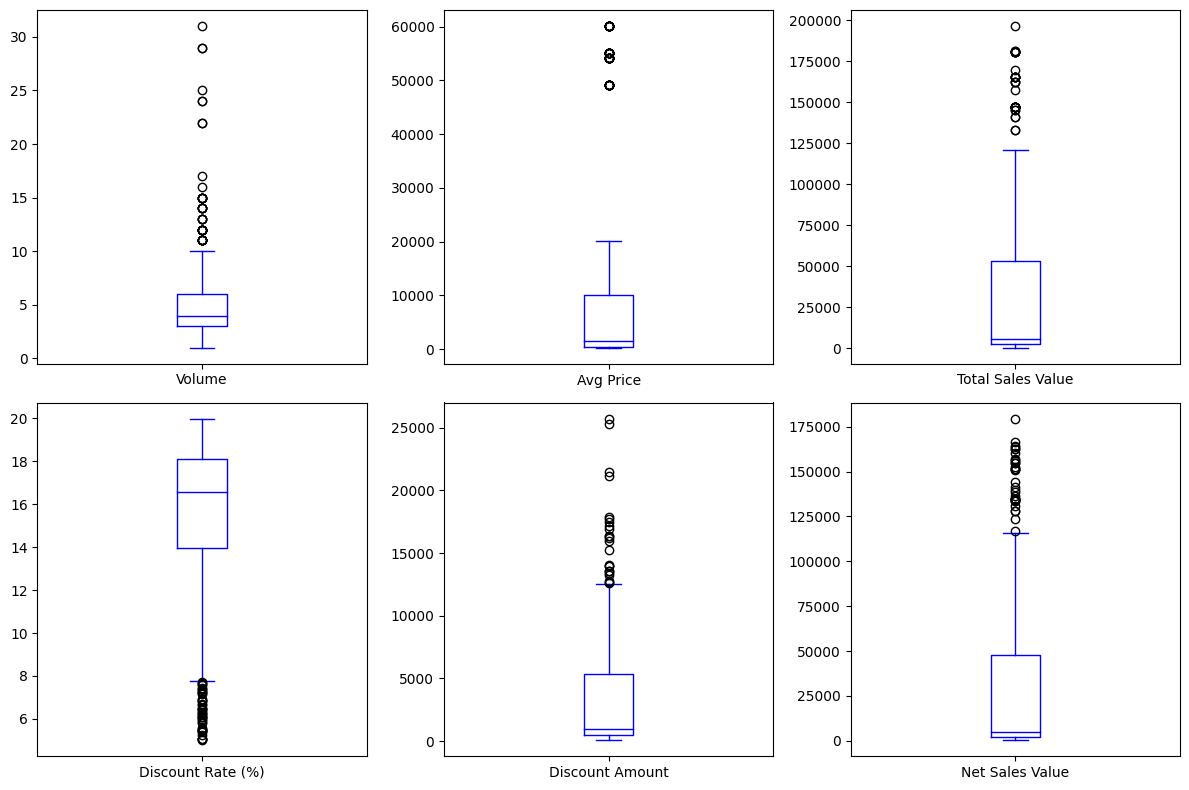

In [7]:
# Create boxplots to identify outliers
sales_data[numerical_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8), color='blue')
plt.tight_layout()
plt.show()

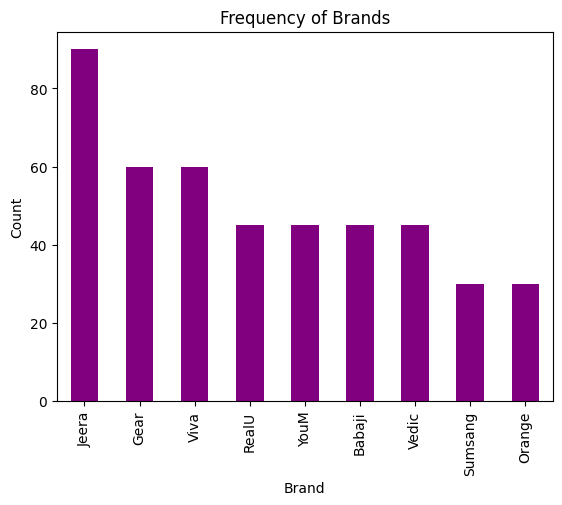

In [8]:
# Bar chart for a categorical column (e.g., Brand)
sales_data['Brand'].value_counts().plot(kind='bar', color='purple')
plt.title('Frequency of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

In [9]:
# Standardization (z-score normalization)
standardized_data = (sales_data[numerical_cols] - sales_data[numerical_cols].mean()) / sales_data[numerical_cols].std()
print(standardized_data.head())

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.543957  
3         1.763847  
4        -0.227342  


In [11]:
# Convert categorical data into dummy variables
categorical_cols = ['City', 'BU', 'Brand', 'Model']  # List of categorical columns
dummy_data = pd.get_dummies(sales_data[categorical_cols], drop_first=True)

In [12]:
# Concatenate the dummy data with the original dataset
sales_data_transformed = pd.concat([sales_data, dummy_data], axis=1)
print(sales_data_transformed.head())

         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  ...  Model_Vedic Cream  Model_Vedic Oil  \
0      12100             181500  ...              False            False   
1      10100             101000  ...              False            False   
2      16100             112700  ...              False            False   
3      20100             120600  ...              False            False   
4       8100              24300  ...              False            False   

   Model_Vedic Shampoo  Model_W-Casuals  Model_W-Inners  Model_W-Lounge  \
0                False       